This notebook can be used to study how the recyling ie diversion rates in NYC have changed in the past decade. Additionally we will see how policy changes have, if any, a trickle down effect in the real world. This work has been done by collecting the monthly tonnage data of Organics, Paper, Metal Glass Plastic and recycling as put out by the department of sanitaiton new york on their website. You can find all the pdfs in the github parent folder. Since the data is in the pdf, we will fisrt perform extensive cleaning to extract the data in a usable dataframe format. 

In [29]:
import pandas as pd
import tabula
import PyPDF2
import os
import requests
from tqdm import tqdm
import camelot
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.dates as mdates
import pmdarima as pm
from datetime import datetime 

Code to extract data fro a large number of pdf files. DSNY releases data in pdf format so we have to extract it using tools like camelot. 

In [2]:
def extract_annual_disposal_diversion(data_folder_name):
    # Create an empty DataFrame to store all results
    combined_df = pd.DataFrame()
    
    # Loop through 12 years of PDFs
    for i in range(12):
        file_path = f"{data_folder_name}/dsny-non-dsny-collections-fy{2012+i}.pdf"
        print(f"Processing: {file_path}")
        
        try:
            # Extract tables from the PDF
            tables = camelot.read_pdf(file_path, pages="all", flavor='lattice')
            
            # Process each table found in the PDF
            for table_index, table in enumerate(tables):
                # Get the current table's DataFrame
                current_df = table.df.copy()
                
                # Add metadata if needed
                current_df['source_file'] = f"fy{2012+i}"
                current_df['table_number'] = table_index + 1
                
                # Append to the combined DataFrame
                combined_df = pd.concat([combined_df, current_df], ignore_index=True)
                
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
    
    return combined_df

In [3]:
def extract_monthly_disposal_diversion(data_folder_name):
    # Create an empty DataFrame to store all results
    combined_df = pd.DataFrame()
    
    # Loop through 10 years of PDFs
    for i in range(10):
        for j in range(1,13):
            file_path = f"{data_folder_name}/dsny-collections-monthly-{2015+i}-{j:02d}.pdf"
            print(f"Processing: {file_path}")
        
            try:
                # Extract tables from the PDF
                tables = camelot.read_pdf(file_path, pages="all", flavor='lattice')
                
                # Process each table found in the PDF
                for table_index, table in enumerate(tables):
                    # Get the current table's DataFrame
                    current_df = table.df.copy()
                    
                    # Add metadata if needed
                    current_df['month_file'] = f"fy{j}"
                    current_df['source_file'] = f"fy{2015+i}"
                    current_df['table_number'] = j + 1
                    
                    # Append to the combined DataFrame
                    combined_df = pd.concat([combined_df, current_df], ignore_index=True)
                    
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
        
    return combined_df

In [6]:
tables = camelot.read_pdf("Month_collections_dsny/dsny-collections-monthly-2016-05.pdf", pages="all", flavor='lattice')
combined_df = pd.DataFrame()
for table_index, table in enumerate(tables):
    # Get the current table's DataFrame
    current_df = table.df.copy()    

CropBox missing from /Page, defaulting to MediaBox


<TableList n=1>

The following code will extract data for all months and compile it into one document. The codes takes about 5-6 miniutes. 

In [7]:
df_month=extract_monthly_disposal_diversion("Month_collections_dsny")

Processing: Month_collections_dsny/dsny-collections-monthly-2015-01.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2015-02.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2015-03.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2015-04.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2015-05.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2015-06.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2015-07.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2015-08.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2015-09.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2015-10.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2015-11.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2015-12.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-01.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-02.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2016-03.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-04.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-05.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-06.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-07.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-08.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-09.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2016-10.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2016-11.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2016-12.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2017-01.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2017-02.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2017-03.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-04.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-05.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-06.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-07.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-08.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-09.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-10.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-11.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2017-12.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2018-01.pdf


CropBox missing from /Page, defaulting to MediaBox


Processing: Month_collections_dsny/dsny-collections-monthly-2018-02.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-03.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-04.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-05.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-06.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-07.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-08.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-09.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-10.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-11.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2018-12.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2019-01.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2019-02.pdf
Processing: Month_collections_dsny/dsny-collections-monthly-2019

DSNY changed its labelling of data columns so we must clean it. 

In [9]:
def standardize_borough_names(df, column_name):
    # Create a mapping dictionary for corrections
    corrections = {
        'Manha�an': 'Manhattan',
        'Manha�an Total': 'Manhattan Total',
        'Manha�an  Total': 'Manhattan Total'
    }
    
    # Apply corrections
    df[column_name] = df[column_name].replace(corrections)
    
    return df
df_month=standardize_borough_names(df_month,0)

In [10]:
def extract_specific_rows(combined_df, column_name, pattern_list):
    """
    Extract rows where a column exactly matches any string from a given list of patterns.
    """
    # Create a mask for rows we want to extract
    mask = combined_df[column_name].isin(pattern_list)
    
    # Create the extracted DataFrame
    extracted_df = combined_df.loc[mask].copy()
    
    # Create the remaining DataFrame
    remaining_df = combined_df.loc[~mask].copy()
    
    # Reset indices for both DataFrames
    extracted_df.reset_index(drop=True, inplace=True)
    remaining_df.reset_index(drop=True, inplace=True)
    
    return extracted_df, remaining_df

Some of the pdfs interchangebly use the follwing names so we must match patterns and clean accordingly. 

In [11]:
# Define patterns to match
patterns = ['Manhattan', 'Manhattan Total', 'Brooklyn', 'Brooklyn Total', 'Bronx', 'Bronx Total','Queens','Queens Total', 'Staten Island',
           'Staten Island Total','Grand Total','Brooklyn Total']

# Extract rows that match any of the patterns in the specified column
extracted_df, remaining_df = extract_specific_rows(df_month, 0, patterns)

print(f"Extracted {len(extracted_df)} rows")
print(f"Remaining {len(remaining_df)} rows")

Extracted 1164 rows
Remaining 6885 rows


In [12]:
# Define the patterns to filter out
patterns = ['MN', 'BK', 'BX', 'QE', 'QW', 'SI',"10NM","10NKB","10XB","70EQ"]

# Create a regex pattern that matches any of these strings
pattern = '|'.join(patterns)

# Filter the DataFrame to drop rows containing any of these patterns in the first column
filtered_df = extracted_df[~extracted_df.iloc[:, 1].astype(str).str.contains(pattern)]


In [13]:
#Certain rows require more cleaning to match styles. 
matching_rows = filtered_df[filtered_df.iloc[:,13].astype(str).str.contains(specific_string)]
n=4
matching_rows.iloc[n*6:(n+1)*6]

,0,1,2,3,4,5,6,7,8,9,10,11,month_file,source_file,table_number
137,Manhattan Total,,8.3,182.3,263.7,1844.7,19.8%,8.8,171.5,277.0,1889.8,19.5%,fy6,fy2016,7
139,Bronx Total,,6.0,138.7,130.8,1810.7,13.2%,5.5,123.7,131.2,1797.0,12.7%,fy6,fy2016,7
141,Brooklyn Total,,22.2,259.8,324.4,3292.7,15.5%,19.3,244.5,339.0,3315.9,15.4%,fy6,fy2016,7
143,Queens Total,,18.0,285.7,298.3,2883.5,17.3%,9.7,259.6,321.8,2917.9,16.8%,fy6,fy2016,7
144,Staten Island Total,,8.5,81.2,85.4,742.7,19.1%,9.2,70.9,93.3,729.0,19.2%,fy6,fy2016,7
145,Grand Total,,62.9,947.7,1102.6,10574.3,16.7%,52.5,870.2,1162.3,10649.6,16.4%,fy6,fy2016,7


In [14]:
def shift_columns(df, split_row_index):
    #df.copy needs parentheses to call the method
    df_new = df.copy()
    
    df_top = df.iloc[:split_row_index+1]
    df_bottom = df.iloc[split_row_index+1:]
    
    # Create DataFrames with the same structure as original
    top_rows = df_top.copy()
    
    #Range should start at 6 and end before 13
    for col in range(6, 13):
        # Issue 4: Check if column is in range
        if col < df_top.shape[1]-1:
            top_rows.iloc[:, col] = df_top.iloc[:, col+1]
    
    #Same issue with empty DataFrame
    bottom_rows = df_bottom.copy()
    
    #Range should start at 0, not 2 if you want to shift all columns
    for col in range(1, 13):
        # Issue 7: Check if column is in range
        if col < df_bottom.shape[1]-1:
            bottom_rows.iloc[:, col] = df_bottom.iloc[:, col+1]
    
    df_new = pd.concat([top_rows, bottom_rows], ignore_index=True)
    return df_new

final_filtered_df=shift_columns(filtered_df,35)

Standardize the language per borough

In [93]:
def df_per_borough(df,borough_code):
    df_borough=pd.DataFrame()
    k=0
    for j in range(len(df)):
        if final_filtered_df[0][j]==borough_code:
            k=k+1
            df_borough=pd.concat([df_borough, df.iloc[[j]]], ignore_index=True)
    return df_borough

def standardize_borough_names_final(df, column_name):
    # Create a mapping dictionary for corrections
    corrections = {
        'Bronx': 'Bronx Total',
        'Manhattan': 'Manhattan Total',
        'Brooklyn': 'Brooklyn Total',
        'Queens': 'Queens Total',
        'Staten Island': 'Staten Island Total'
    }
    
    # Apply corrections
    df[column_name] = df[column_name].replace(corrections)
    
    return df
final_filtered_df=standardize_borough_names_final(final_filtered_df,0)

In [33]:
df_BX=df_per_borough(final_filtered_df,"Bronx Total")
df_MN=df_per_borough(final_filtered_df,"Manhattan Total")
df_BK=df_per_borough(final_filtered_df,"Brooklyn Total")
df_Q=df_per_borough(final_filtered_df,"Queens Total")
df_SI=df_per_borough(final_filtered_df,"Staten Island Total")
df_tot=df_per_borough(final_filtered_df,"Grand Total")

Finally we have cleaned the data such that we can use it for plotting. We will plot diversion rate for the boroughs as a function of time in the past decade. 

In [51]:
#run this to see the sample data. 
df_MN

,0,1,2,3,4,5,6,7,8,9,10,11,month_file,source_file,table_number
0,Manhattan Total,30.8,169.9,241.6,"1,669.0",21.0%,24.5,164.8,241.7,"1,739.1",19.9%,fy1,fy2015,fy2015,2
1,Manhattan Total,7.9,176.6,243.7,"1,622.9",20.9%,4.5,152.0,223.8,"1,731.8",18.0%,fy2,fy2015,fy2015,3
2,Manhattan Total,10.1,163.9,248.7,"1,776.7",19.2%,7.1,149.9,227.6,"1,770.7",17.8%,fy3,fy2015,fy2015,4
3,Manhattan Total,8.4,167.7,248.1,"1,761.6",19.4%,5.8,156.5,249.3,"1,842.6",18.3%,fy4,fy2015,fy2015,5
4,Manhattan Total,10.1,167.6,245.6,"1,828.9",18.8%,7.3,154.8,262.9,"1,882.5",18.4%,fy5,fy2015,fy2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Manhattan Total,219.0,3544.5,5083.6,39238.1,18.4%,200.3,4646.6,6491.9,48385.3,19.0%,fy8,fy2024,fy2024,9
115,Manhattan Total,436.5,3705.3,5651.4,40497.7,19.5%,398.9,3896.8,6003.3,40858.3,20.1%,fy9,fy2024,fy2024,10
116,Manhattan Total,680.9,4659.6,6810.9,50100.0,19.5%,479.6,3871.6,5584.5,40740.7,19.6%,fy10,fy2024,fy2024,11
117,Manhattan Total,707.4,3626.6,5256.1,40390.1,19.2%,573.4,4887.4,6908.1,50759.3,19.6%,fy11,fy2024,fy2024,12


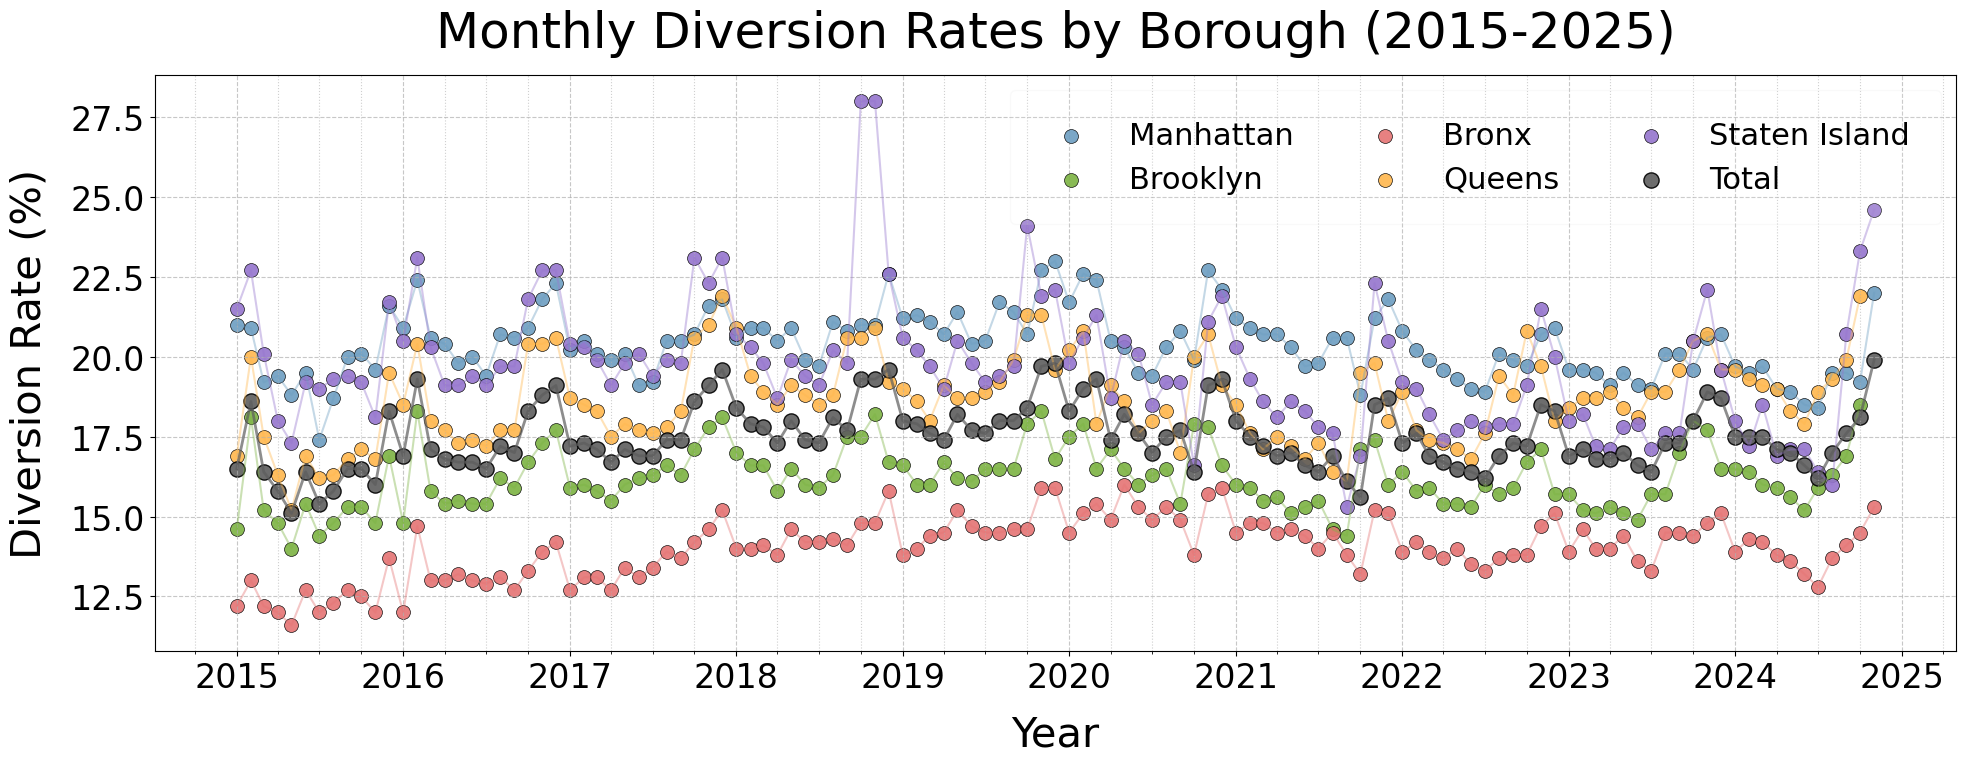

In [36]:
def clean_percentage(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', ''))
    return value

# Define borough colors - using the same colors from before
borough_colors = {
    'MN': '#6D9EC1',  # Darker pastel blue for Manhattan
    'BK': '#7CB342',  # Darker pastel green for Brooklyn
    'BX': '#E57373',  # Darker pastel red for Bronx
    'Q': '#FFB74D',   # Darker pastel orange for Queens
    'SI': '#9575CD',  # Darker pastel purple for Staten Island
    'Total': '#5D5D5D'  # Dark grey for Total
}

# First define y variables and clean the data
y_MN = [clean_percentage(val) for val in df_MN.iloc[:, 5].tolist()]
y_BK = [clean_percentage(val) for val in df_BK.iloc[:, 5].tolist()]
y_BX = [clean_percentage(val) for val in df_BX.iloc[:, 5].tolist()]
y_Q = [clean_percentage(val) for val in df_Q.iloc[:, 5].tolist()]
y_SI = [clean_percentage(val) for val in df_SI.iloc[:, 5].tolist()]
y_Tot = [clean_percentage(val) for val in df_tot.iloc[:, 5].tolist()]

# Create a date range from January 2015 to December 2024
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2024-12-01')
dates = pd.date_range(start=start_date, end=end_date, freq='MS')  # MS = Month Start

# Function to ensure data and dates match length
def match_data_to_dates(data, dates):
    # If data is shorter than dates, use only the corresponding dates
    if len(data) < len(dates):
        return data, dates[:len(data)]
    # If data is longer than dates, truncate data to match dates
    elif len(data) > len(dates):
        return data[:len(dates)], dates
    # If they're the same length, return as is
    else:
        return data, dates

# Match each borough's data to the date range
y_MN, dates1 = match_data_to_dates(y_MN, dates)
y_BK, dates2 = match_data_to_dates(y_BK, dates)
y_BX, dates3 = match_data_to_dates(y_BX, dates)
y_Q, dates4 = match_data_to_dates(y_Q, dates)
y_SI, dates5 = match_data_to_dates(y_SI, dates)
y_Tot, dates6 = match_data_to_dates(y_Tot, dates)

# Create the figure with a larger size for better readability
plt.figure(figsize=(20, 8))

# Plot scatter points with the borough colors
plt.scatter(dates1, y_MN, color=borough_colors['MN'], label="Manhattan", s=100, alpha=0.9, edgecolors='black', linewidths=0.5)
plt.scatter(dates2, y_BK, color=borough_colors['BK'], label="Brooklyn", s=100, alpha=0.9, edgecolors='black', linewidths=0.5)
plt.scatter(dates3, y_BX, color=borough_colors['BX'], label="Bronx", s=100, alpha=0.9, edgecolors='black', linewidths=0.5)
plt.scatter(dates4, y_Q, color=borough_colors['Q'], label="Queens", s=100, alpha=0.9, edgecolors='black', linewidths=0.5)
plt.scatter(dates5, y_SI, color=borough_colors['SI'], label="Staten Island", s=100, alpha=0.9, edgecolors='black', linewidths=0.5)
plt.scatter(dates6, y_Tot, color=borough_colors['Total'], label="Total", s=120, alpha=0.9, marker='o', edgecolors='black', linewidths=1)

# Add connecting lines for each borough to better show the trend
plt.plot(dates1, y_MN, color=borough_colors['MN'], alpha=0.4, linewidth=1.5)
plt.plot(dates2, y_BK, color=borough_colors['BK'], alpha=0.4, linewidth=1.5)
plt.plot(dates3, y_BX, color=borough_colors['BX'], alpha=0.4, linewidth=1.5)
plt.plot(dates4, y_Q, color=borough_colors['Q'], alpha=0.4, linewidth=1.5)
plt.plot(dates5, y_SI, color=borough_colors['SI'], alpha=0.4, linewidth=1.5)
plt.plot(dates6, y_Tot, color=borough_colors['Total'], alpha=0.7, linewidth=2.0)

# Set title and labels with increased font sizes
plt.title('Monthly Diversion Rates by Borough (2015-2025)', fontsize=36, pad=20)
plt.xlabel('Year', fontsize=30, labelpad=15)
plt.ylabel('Diversion Rate (%)', fontsize=30, labelpad=15)

# Configure x-axis to show years properly
years_locator = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years_locator)
ax.xaxis.set_major_formatter(years_fmt)

# Add minor ticks for quarters
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
ax.xaxis.grid(True, which='minor', linestyle=':', alpha=0.6)

# Increase tick label size
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=22, framealpha=0.1, loc='upper right', ncol=3, borderpad=1, handletextpad=0.9)

plt.tight_layout()
plt.savefig("diversion_rates_by_borough_2015_2024.png", dpi=300, bbox_inches='tight')
plt.show()


From the above we can see that the diversion rate in the city fluctuates and seems to have a seasonality in the pattern. 

Manhattan and Staten Island seem to be outperfoiming the others. Interestingly, Bronx and Queens have shown improvement in the last decase. Brooklyn is somewhat constant with fluctuations around ~16%. Weirdly enough, not much has changes in the past decade. 

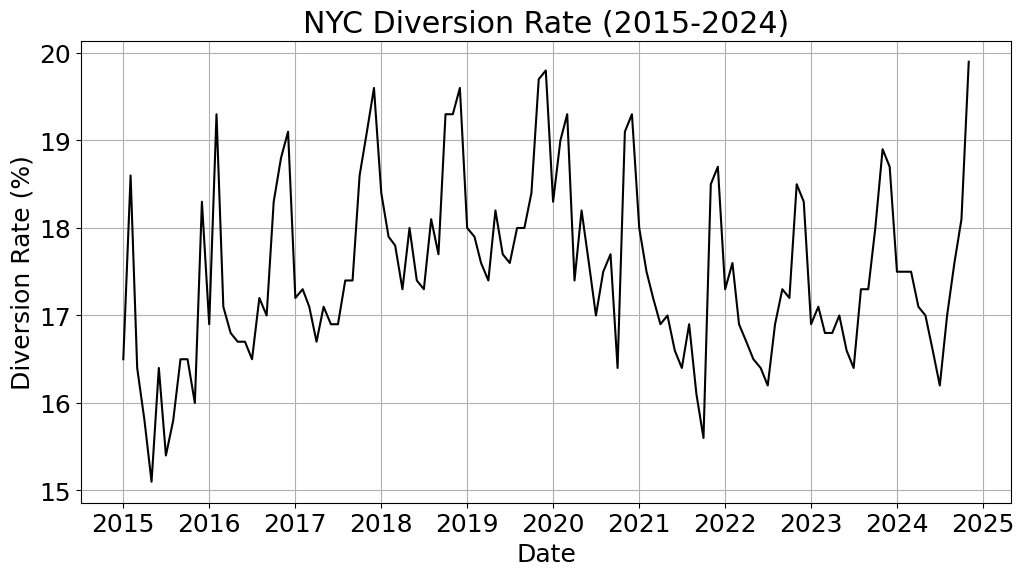

In [94]:
#Lets see the total of NYC.
dates = pd.date_range(start='2015-01-01', periods=len(y_Tot), freq='MS')

# Create a time series
ts_data = pd.Series(y_Tot, index=dates)

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(ts_data,color='black')
plt.title('NYC Diversion Rate (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Diversion Rate (%)')
plt.grid(True)
plt.show()

The NYC total diversion rate has barely shown improvement of less than 5% in the past decade with an upward trend until covid hit. 

Since there is seasonality and time series involved, we can run simple statistical model and see what the future of NYC looks like if things were to stay the same. To do so we must first check if the time series is stationary ie just fluctuating around a fixed mean or if it has fluctuations with the mean also changing. 

We will run a Augmented Dickey-Fuller (ADF) test to check if the time series data is stationary. Here's what it does:
The assumption here is that a stationary series would have a: Constant mean over time (no upward/downward trend), have a Constant variance over time and no seasonal patterns that change the statistical properties

The ADF test will test the Null hypothesis:
Null hypothesis (H₀): The series is NOT stationary
The Alternative hypothesis (H₁) is that series is stationary

So getting a ADF Statistic that is more negative implies more likely to be stationary
in fact, generally a  p value less than 0.05, we can reject null hypothesis and say thatt the series IS stationary. But is the p-value is > 0.05, we fail to reject null and that implies that the series is NOT stationary. 

In [23]:
# Test for stationarity
result = adfuller(ts_data.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
    print("The series is stationary")
else:
    print("The series is not stationary, differencing may be needed")

ADF Statistic: -2.160288362969279
p-value: 0.2209727568811748
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
The series is not stationary, differencing may be needed


The series is not stationary. this means we have to fix the series by making it stationary such that we can use it for models like ARIMA which rely on the time series being stationary. 

An option is Differencing. This implies subtracting the subsequent data values. 

Doing so removes the trend, focuses on period-to-period changes. The differences often have constant mean (stationary).

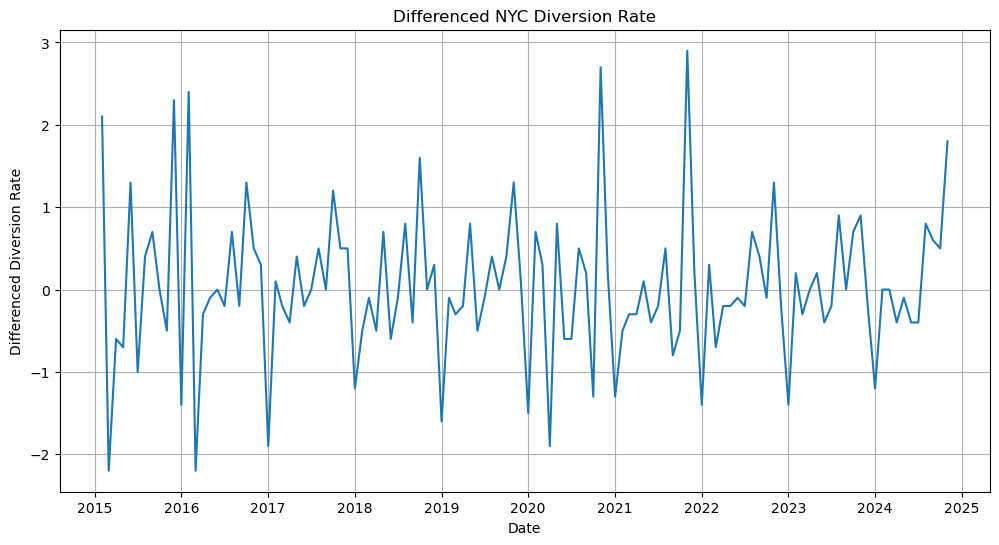

Differenced ADF Statistic: -4.339898995052997
Differenced p-value: 0.0003786103796312156


In [24]:
#Lets try differencing 
if result[1] > 0.05:
    ts_diff = ts_data.diff().dropna()
    
    # Plot differenced series
    plt.figure(figsize=(12, 6))
    plt.plot(ts_diff)
    plt.title('Differenced NYC Diversion Rate')
    plt.xlabel('Date')
    plt.ylabel('Differenced Diversion Rate')
    plt.grid(True)
    plt.show()
    
    # Test differenced series for stationarity
    result_diff = adfuller(ts_diff.dropna())
    print('Differenced ADF Statistic:', result_diff[0])
    print('Differenced p-value:', result_diff[1])

Now the ADF value is large and negative and also the p-value is less than 0.005 which means differencing worked!

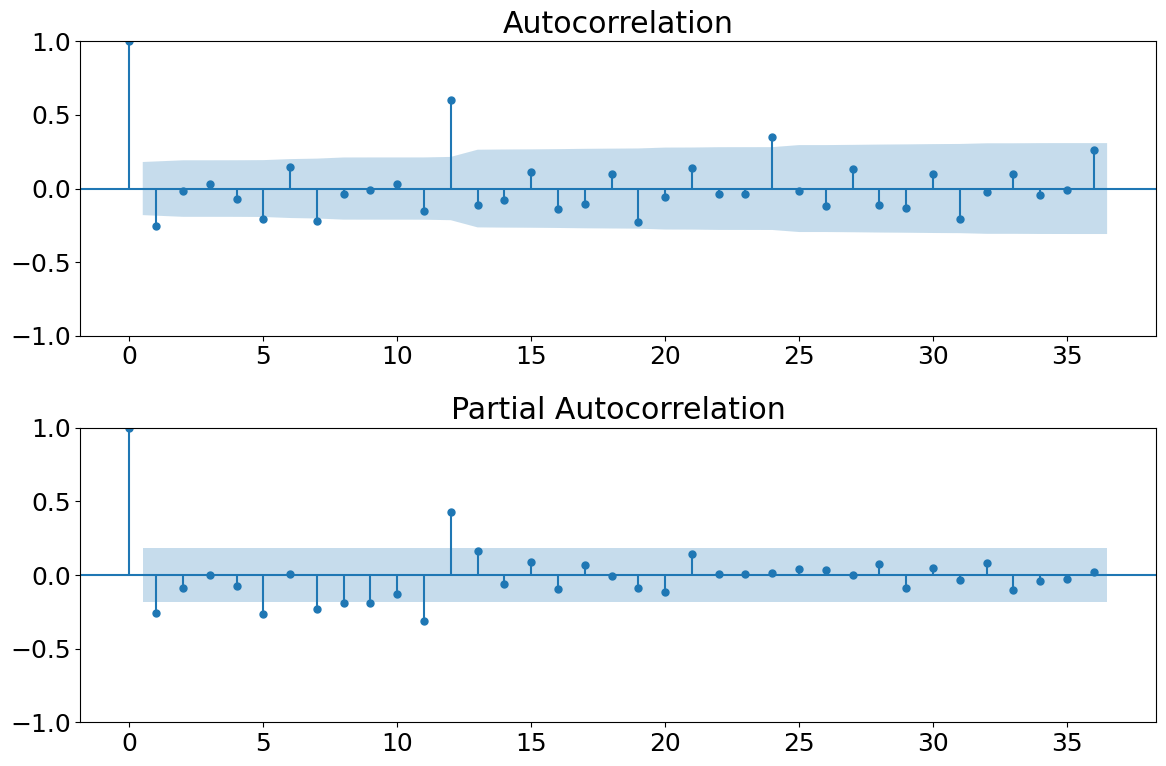

In [95]:
data_to_use = ts_diff
# Plotting the autocorrelation and partial autocorrelation function is a good way 
#to visually check that Differencing worked!
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_to_use.dropna(), ax=ax1, lags=36)
plot_pacf(data_to_use.dropna(), ax=ax2, lags=36)
plt.tight_layout()
plt.show()

Since the values are not is a tight band (fixed variance) and not showing upward trend etc, we can conclude that the differencing worked!, 

Now lets try to build a SARIMA or ARIMA model which can help forecast the diversion rates etc in the city. 

ARIMA(p,d,q) has three components:

p:Uses past values to predict current value -> 
Example: Today's diversion rate = 
0.5 × yesterday's rate + 0.3 × day-before-yesterday's rate + error

d: differencing 
if d=1: Use first differences
if  d=2: Use second differences (difference of differences)

q: moving average 
This says that current value depends on previous error
and if we over-predicted yesterday, adjust today's forecast

if we had a fourth variabel s: seasonality, it would mean SARIMA model where s=12 would mean an yearly periodicity in the pattern. 

In [30]:
# Auto ARIMA can help to find optimal p, d, q values
auto_model = pm.auto_arima(ts_data, seasonal=True, m=12,
                           start_p=0, start_q=0, max_p=5, max_q=5, d=None, max_d=2,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, D=None, max_D=1,
                           trace=True, error_action='ignore', suppress_warnings=True,
                           stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=344.168, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=226.240, Time=0.66 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=268.303, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1021.387, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=296.067, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=249.547, Time=0.25 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=276.484, Time=0.23 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=224.966, Time=0.57 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=297.042, Time=0.06 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=250.674, 

Based on the above summary, we can use the SARIMA model with the follwoing parameters ARIMA(2,0,0)(1,0,0)
Below is the code to run this on the past decade and also use four months from 2024 as test data. We will train the model on data up till the last 4 months. We will keep data from these for our model testing and validaitons. We will generate the predictions for upto 24 months in the future. We will calculate a 95% confidence level interval in the future. 

We will proceed by first checking the validity of the model on the 4 months. If it passes the 95% confidence level test, then we can have some surity about our model. 

Training data: 115 observations, Test data: 4 observations

Test Set Metrics:
Mean Squared Error (MSE): 0.7361
Root Mean Squared Error (RMSE): 0.8579
Mean Absolute Error (MAE): 0.6437
R² Score: 0.3722
Optimal SARIMA order: (2, 0, 0)(1, 0, 0, 12)


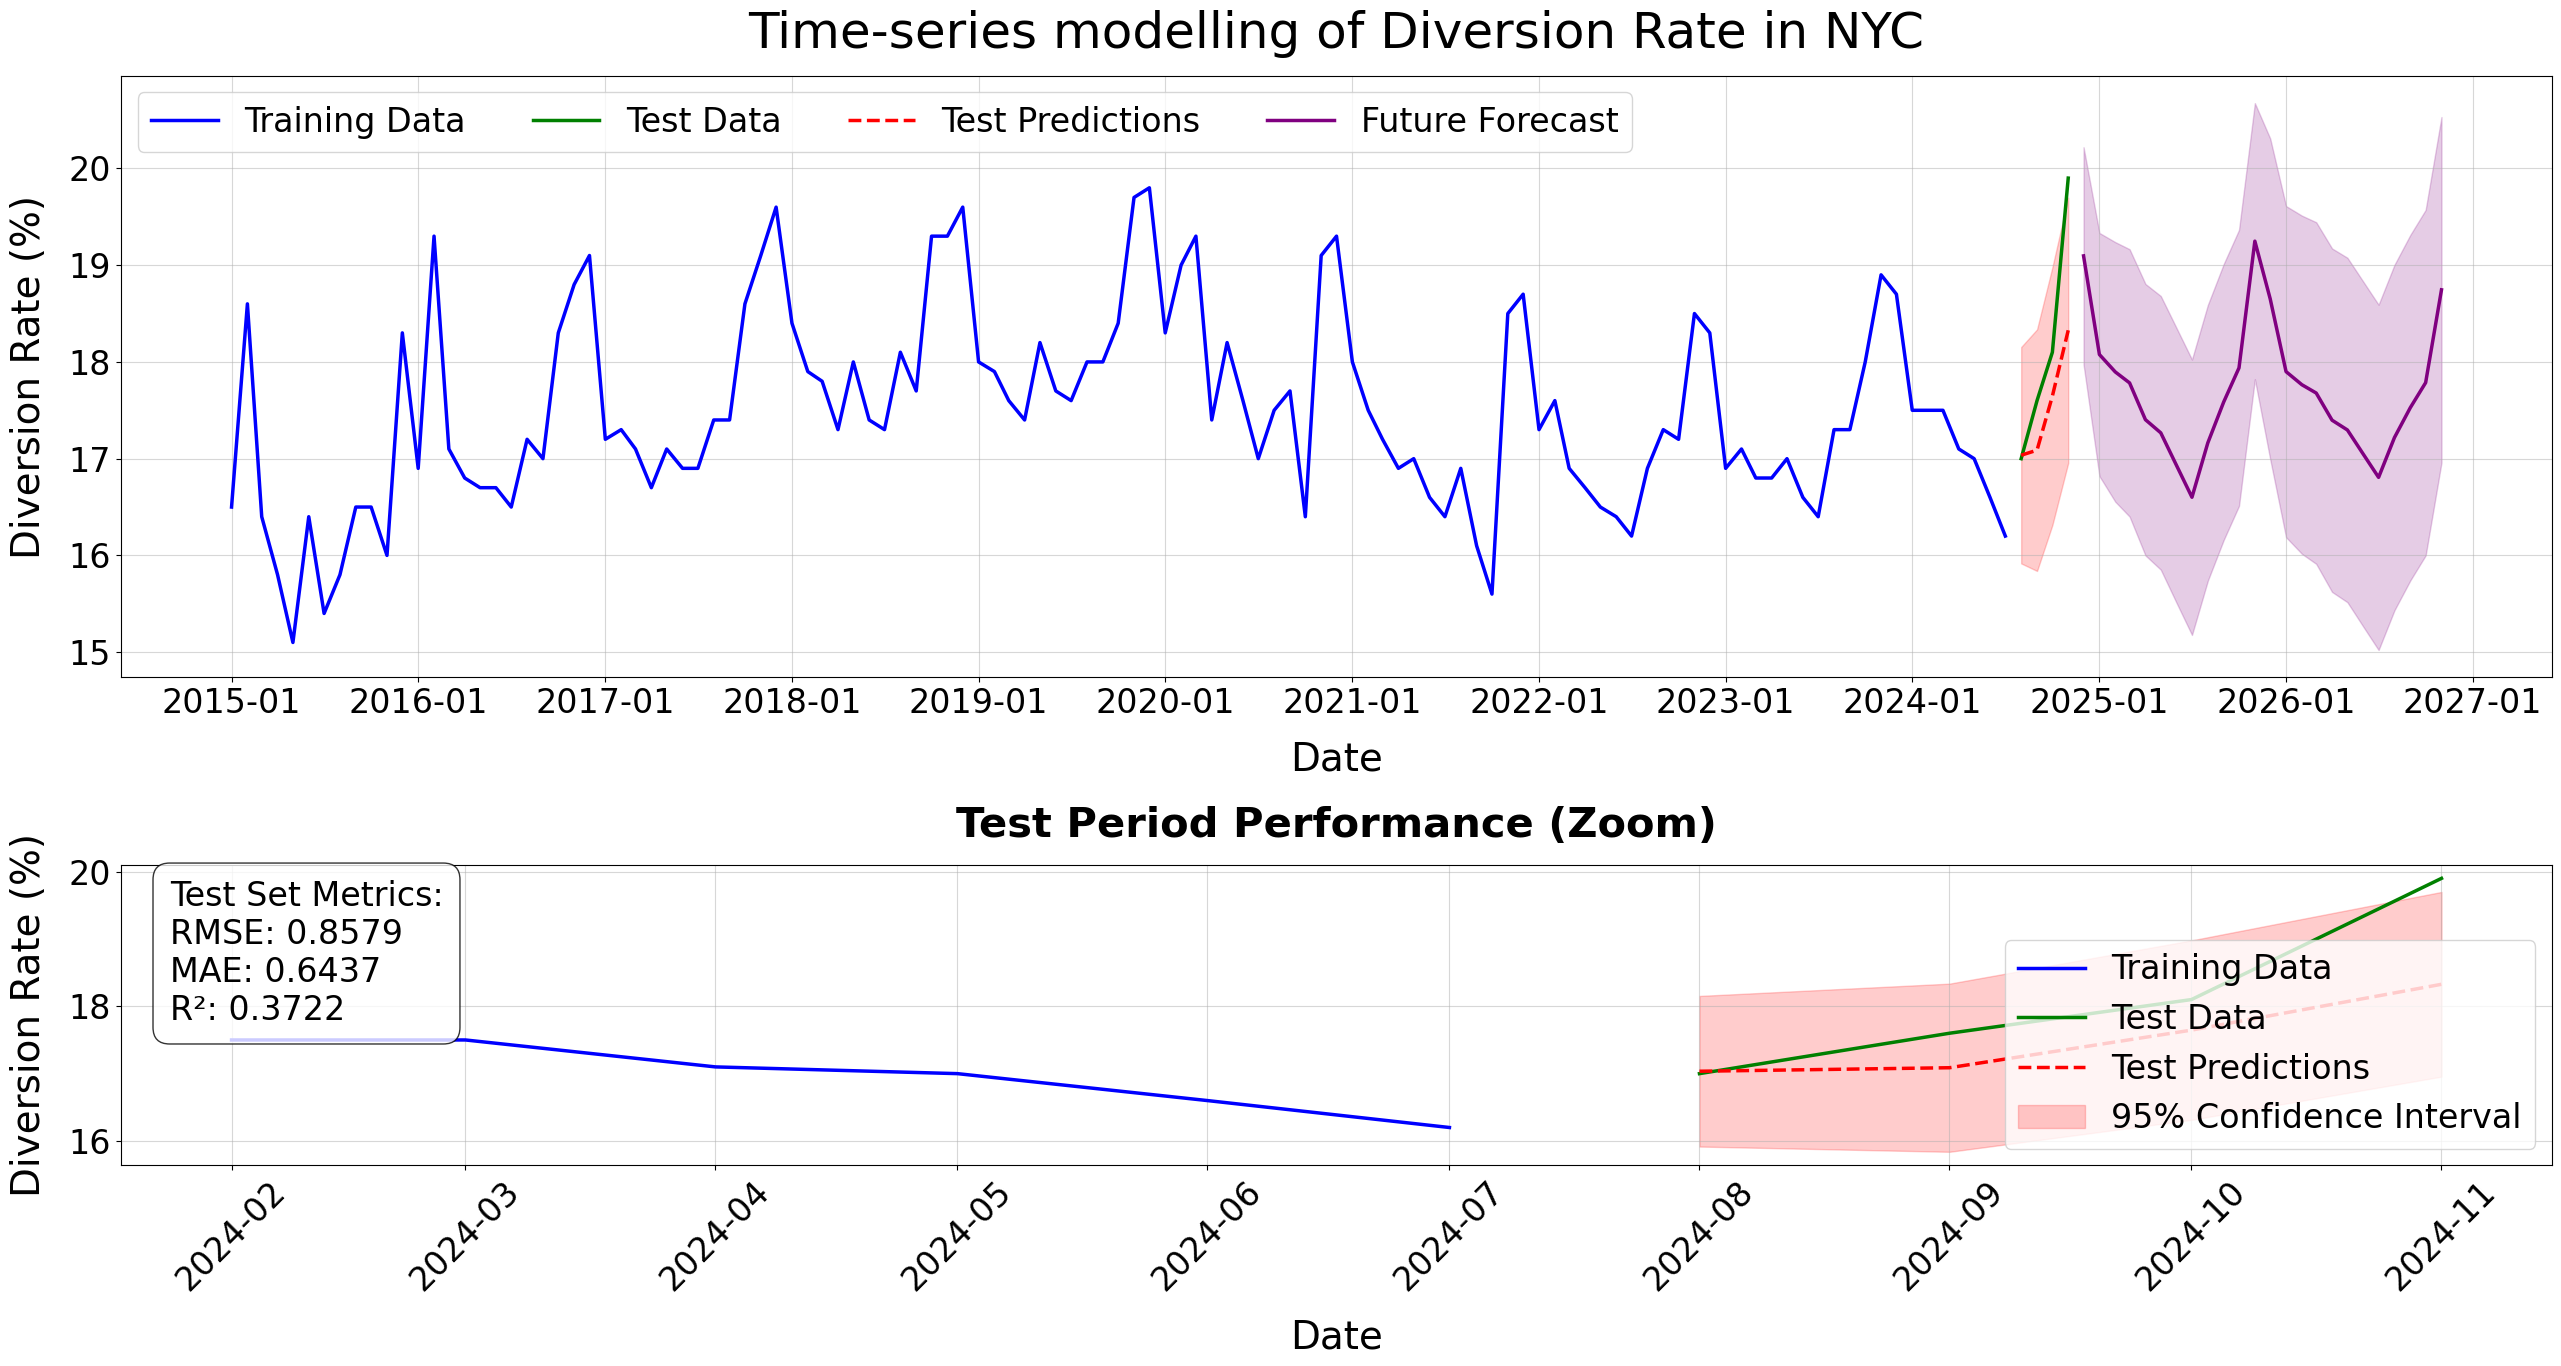

In [96]:
test_size = 4  # Last 4 months
train_data = ts_data[:-test_size]
test_data = ts_data[-test_size:]

print(f"Training data: {len(train_data)} observations, Test data: {len(test_data)} observations")

# Generate predictions for the test set
test_predictions = auto_model.predict(n_periods=len(test_data))
test_conf_int = auto_model.predict(n_periods=len(test_data), return_conf_int=True)[1]

# Calculate error metrics for the test set
mse = mean_squared_error(test_data, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, test_predictions)
r2 = r2_score(test_data, test_predictions)

print(f"\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

model_order = auto_model.order
model_seasonal_order = auto_model.seasonal_order
print(f"Optimal SARIMA order: {model_order}{model_seasonal_order}")

# Refit with full data
full_model = auto_arima(
    ts_data,
    start_p=model_order[0], d=model_order[1], start_q=model_order[2],
    start_P=model_seasonal_order[0], D=model_seasonal_order[1], 
    start_Q=model_seasonal_order[2], m=model_seasonal_order[3],
    seasonal=True,
    trace=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False  # Skip stepwise as we already know the best parameters
)

# Number of periods to forecast
forecast_steps = 24  # 24 months ahead

# Generate future forecast with confidence intervals
forecast, conf_int = full_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Create forecast dates
forecast_dates = pd.date_range(
    start=ts_data.index[-1] + pd.DateOffset(months=1),
    periods=forecast_steps, 
    freq='MS'
)

# Create test prediction dates for plotting
test_dates = test_data.index

# Set larger font size for all elements
plt.rcParams.update({'font.size': 18})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(26, 14), gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Full series with test period and future forecast
ax1.plot(train_data, label='Training Data', color='blue', linewidth=2.5)
ax1.plot(test_data, label='Test Data', color='green', linewidth=2.5)

# Plot test predictions
ax1.plot(test_dates, test_predictions, 
         label='Test Predictions', color='red', linestyle='--', linewidth=2.5)
ax1.fill_between(
    test_dates,
    test_conf_int[:, 0],
    test_conf_int[:, 1],
    color='red', alpha=0.2
)

# Plot future forecast
ax1.plot(forecast_dates, forecast, 
         label='Future Forecast', color='purple', linewidth=2.5)
ax1.fill_between(
    forecast_dates,
    conf_int[:, 0],
    conf_int[:, 1],
    color='purple', alpha=0.2
)

ax1.set_title('Time-series modelling of Diversion Rate in NYC', fontsize=36, pad=20)
ax1.set_xlabel('Date', fontsize=28, labelpad=15)
ax1.set_ylabel('Diversion Rate (%)', fontsize=28, labelpad=15)

ax1.grid(True, alpha=0.5)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.legend(loc='upper left',ncol=4, fontsize=24)

# Zoom in on test period
ax2.plot(train_data.iloc[-6:], label='Training Data', color='blue', linewidth=2.5)  # Last 6 months of training
ax2.plot(test_data, label='Test Data', color='green', linewidth=2.5)
ax2.plot(test_dates, test_predictions, 
         label='Test Predictions', color='red', linestyle='--', linewidth=2.5)
ax2.fill_between(
    test_dates,
    test_conf_int[:, 0],
    test_conf_int[:, 1],
    color='red', alpha=0.2,
    label='95% Confidence Interval'
)

# Add metrics annotation to plot 2 with increased font size
metrics_text = (
    f"Test Set Metrics:\n"
    f"RMSE: {rmse:.4f}\n"
    f"MAE: {mae:.4f}\n"
    f"R²: {r2:.4f}"
)
ax2.annotate(
    metrics_text,
    xy=(0.02, 0.95),
    xycoords='axes fraction',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
    va='top',
    fontsize=24
)

# Format plot 2 with increased font sizes
ax2.set_title('Test Period Performance (Zoom)', fontsize=30, fontweight='bold', pad=20)
ax2.set_xlabel('Date', fontsize=28, labelpad=15)
ax2.set_ylabel('Diversion Rate (%)', fontsize=28, labelpad=15)
ax2.legend(loc='lower right', fontsize=24)
ax2.grid(True, alpha=0.5)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
ax2.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout()
plt.savefig('sarima_with_test_validation.png', dpi=300, bbox_inches='tight')
plt.show()

We see that the model does a good job at predicting the diverison rate in the test period.In fact we can associate stats as is shown to how well the fit is. 

Now lets see if policies have any effect on the recyling in the city. We know that in October 2022 (https://www.nyc.gov/office-of-the-mayor/news/084-23/mayor-adams-roadmap-nation-s-largest-compost-collection-program-including-achieving#/0) organics composting in Queens was stsrted followed by Brooklyn and now in April 2025 all other boroughs have to also compost. We can try to visualize if policies like this have any effect on the ground?

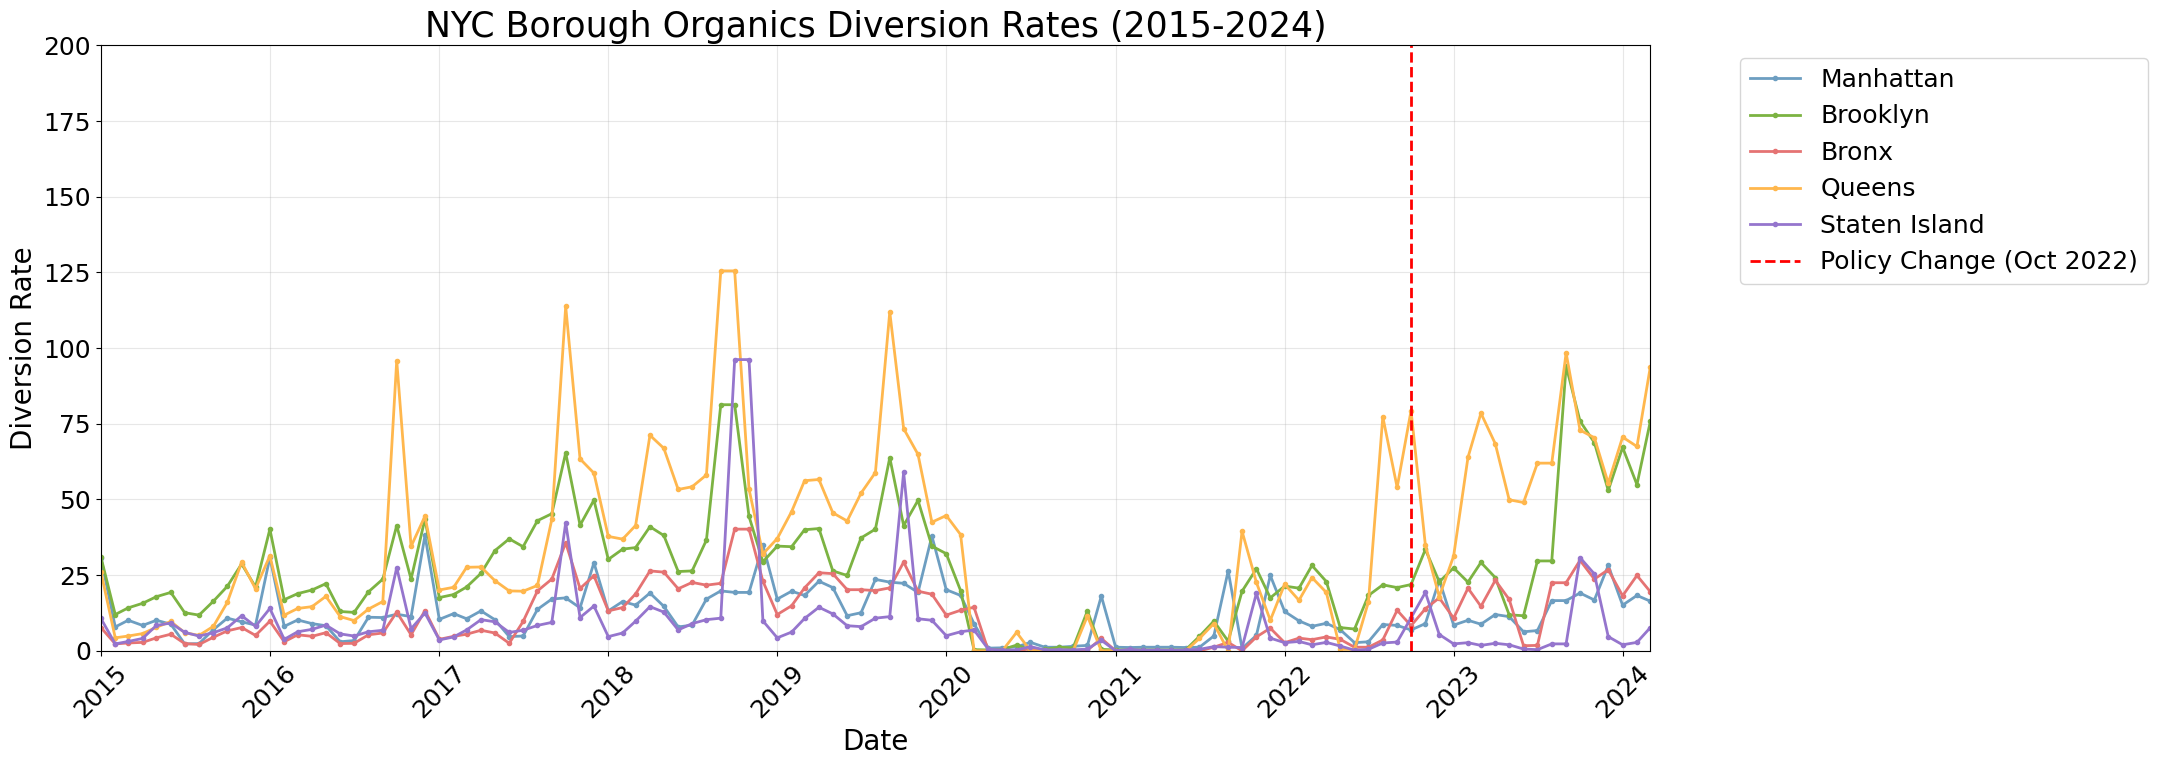

In [97]:
dates = pd.date_range(start='2015-01-01', periods=len(y_MN), freq='MS')

# Create DataFrames (your existing code)
manhattan_df = pd.DataFrame({
    'date': dates,
    'borough': 'Manhattan',
    'diversion_rate': y_MN_organics,
    'color': '#6D9EC1'
})
brooklyn_df = pd.DataFrame({
    'date': dates,
    'borough': 'Brooklyn',
    'diversion_rate': y_BK_organics,
    'color':'#7CB342'
})
bronx_df = pd.DataFrame({
    'date': dates,
    'borough': 'Bronx',
    'diversion_rate': y_BX_organics,
    'color':'#E57373'
})
queens_df = pd.DataFrame({
    'date': dates,
    'borough': 'Queens',
    'diversion_rate': y_Q_organics,
    'color':'#FFB74D'
})
staten_df = pd.DataFrame({
    'date': dates,
    'borough': 'Staten Island',
    'diversion_rate': y_SI_organics,
    'color':'#9575CD'
})

all_boroughs = pd.concat([manhattan_df, brooklyn_df, bronx_df, queens_df, staten_df])

# Create the plot
plt.figure(figsize=(22, 8))

# Plot each borough
for borough in all_boroughs['borough'].unique():
    borough_data = all_boroughs[all_boroughs['borough'] == borough]
    plt.plot(borough_data['date'], borough_data['diversion_rate'], 
             label=borough, linewidth=2, marker='o', 
             color=borough_data['color'].iloc[0],  # Fix: get the first value
             markersize=3)

# Add vertical line for policy change in October 2022
policy_date = datetime(2022, 10, 1)
plt.axvline(x=policy_date, color='red', linestyle='--', linewidth=2, 
            label='Policy Change (Oct 2022)')

# Customize the plot
plt.title('NYC Borough Organics Diversion Rates (2015-2024)', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Diversion Rate', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Set date limits
plt.xlim(datetime(2015, 1, 1), datetime(2024, 3, 1))
plt.ylim(0,200)

plt.tight_layout()
plt.savefig("oragnics_after_policy.png",dpi=300,bbox_inches="tight")
plt.show()

So we can by eye see few interesting points: 1) composting in Queens was traditionally always better than in other boroughs. 2) During covid composting was almost halted. 3) post 2022 the composting in Queens is significantly better than in pther boroughs. 

However we would like to be more precise and give statistical signifcance to what we are seeing. To do so, lets run simple linear Difference-in-Difference (DiD) analysis.

We can run a basic DiD analysis which can be done as follows:

Organics_tonnage = β₀ + β₁(treatment) + β₂(post_policy) + β₃(did) + ε

Here β0 is the organics tonnage data, β₁ (treatment) is the baseline difference between Queens and other boroughs,
β₂ (post_policy) is the general time trend affecting all boroughs after Oct 2022
and β₃ (did) is the causal effect - how much extra change Queens experienced due to the policy

So the model will compare:
Control boroughs, before policy: β₀
Control boroughs, after policy: β₀ + β₂

Queens, before policy: β₀ + β₁
Queens, after policy: β₀ + β₁ + β₂ + β₃

The β₃ coefficient is policy effect because it captures the difference between Queens and other boroughs based on policy effect.

Some assumptions are:
(1) Without the policy, Queens would have followed the same trend as other boroughs
(2)The policy in Queens didn't affect other boroughs
(3) Nothing else specifically affected Queens at the same time

In [91]:
all_boroughs = pd.concat([manhattan_df, brooklyn_df, bronx_df, queens_df, staten_df])

# Filter to Feb 2024
all_boroughs = all_boroughs[all_boroughs['date'] <= '2024-02-29']

# Create DiD variables
policy_date = pd.Timestamp('2022-10-01')
all_boroughs['post_policy'] = (all_boroughs['date'] >= policy_date).astype(int)
all_boroughs['treatment'] = (all_boroughs['borough'] == 'Queens').astype(int)
all_boroughs['did'] = all_boroughs['post_policy'] * all_boroughs['treatment']

# Run DiD regression
did_model = smf.ols('diversion_rate ~ treatment + post_policy + did', data=all_boroughs).fit()

print("=== Difference-in-Differences Results ===")
print(did_model.summary())
print(f"\nPolicy Effect (DiD coefficient): {did_model.params['did']:.2f}")
print(f"P-value: {did_model.pvalues['did']:.4f}")

=== Difference-in-Differences Results ===
                            OLS Regression Results                            
Dep. Variable:         diversion_rate   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     48.86
Date:                Fri, 23 May 2025   Prob (F-statistic):           5.49e-28
Time:                        12:03:22   Log-Likelihood:                -2386.0
No. Observations:                 550   AIC:                             4780.
Df Residuals:                     546   BIC:                             4797.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercep

Policy Effect: The curbside composting policy increased Queens' diversion rate by 25.08 percentage points compared to what would have happened without the policy.

Intercept (13.79): Baseline diversion rate for control boroughs (non-Queens) before the policy

Treatment (16.11): Queens was already 16.11 points higher than other boroughs even before the policy - Queens was naturally better at organics diversion

Post_policy (5.75): After October 2022, all boroughs saw a 5.75 point increase in diversion rates (general improvement trend)

DID (25.08): The causal effect - Queens got an additional 25.08 point boost specifically from the curbside composting policy

Since the p-value is 0.0000, it implies that the result is Highly statistically significant (much less than 0.05) and that we're 95% confident the true effect is between 14-36 points

This means that without the policy, Queens would have increased by 5.75 points (same as other boroughs). But with the policy, Queens increased by 5.75 + 25.08 = 30.83 points total.

Curbside composting in Queens was highly effective, causing a substantial and statistically significant increase in organics diversion rates.